In [1]:
import galois
import numpy as np
import matplotlib.pyplot as plt
from naive_DPF import NaiveDPF

# Multiple Bit Point Functions

This notebook highlights how to create a point which has a value of multiple bits. 

i.e. $P(5) = 45$ rather than only allowing $P(x) = 1$, which is a single bit point function.

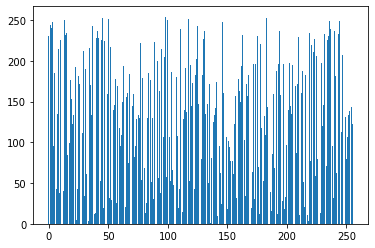

In [2]:
# Generate keys for the point P(5) = 45
x = 5
y = 45

GF = galois.GF(2**8)
DPF = NaiveDPF(GF, 2**8)
sk_0, sk_1 = DPF.gen_keys(x, GF(y))

# Observe that the point function key looks random
plt.bar(np.arange(2**8), sk_0)
plt.show()

In [3]:
# Evaluation is to be done separately by each party (parties should not share evaluated results)
# We will evaluate the function at x=5 (the point), this should yield y=45
eval_0 = DPF.eval_key(sk_0, x)
eval_1 = DPF.eval_key(sk_1, x)

# Adding two evaluations together will reveal the value of the function at x=5
print(f"Expected Value at x={x}:   {y}")
print(f"DPF Output Value at x={x}: {eval_0 + eval_1}")

Expected Value at x=5:   45
DPF Output Value at x=5: 45


In [4]:
# We will evaluate the function at x=10 (not the point), this should yield 0
eval_0 = DPF.eval_key(sk_0, 10)
eval_1 = DPF.eval_key(sk_1, 10)


# Adding two evaluations together will reveal the value of the function at x=5
print(f"Expected Value at x={10}:   {0}")
print(f"DPF Output Value at x={10}: {eval_0 + eval_1}")

Expected Value at x=10:   0
DPF Output Value at x=10: 0
